In [1]:
from qutip import *

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def dot(x,y):
    result = 0
    
    for i in range(len(y)):
        result = result + x[i]*y[i]
        
    return result

In [4]:
# Parameters
N = 10
hbar = 1.0

# Particle
charge = 1.0
mass = 1.0
gfac = 1.0
gyro_ratio = gfac*(charge/(2*mass))

In [5]:
# Direction of any Vector
def direction(vector): 
    x, y, z = vector[0],vector[1],vector[2]
    r = np.sqrt(x**2 + y**2 + z**2)
    phi = np.arctan2(y, x)
    theta = np.arccos(z / r)
    return np.array([theta, phi])

print(direction(np.array([0,0,1])))

[0. 0.]


In [6]:
# Making a Qubit
def qubit(angle):
    up = ket("0")
    down = ket("1")
    a = np.cos(angle[0]/2.0)
    b = np.exp(1j*angle[1])*np.sin(angle[0]/2.0)
    qubit = a*up + b*down
    
    return qubit

print(qubit([np.pi/2.0,0]))

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.70710678]
 [0.70710678]]


In [7]:
# Making a direction from qubit
def qvec(vector):
    
    theta = []
    phi = []
    
    for i in range(len(vector)):
        a, b = vector[i][0],vector[i][1]
        
        theta_i = 2 * np.arccos(np.absolute(a))
        
        if theta_i!=0.0 and b!=1.0 : 
            phi_i = np.arccos((b + np.conj(b))/((2.0)*np.sin(theta_i/2)))
            phi_i = phi_i + np.arccos((a + np.conj(a))/((2.0)*np.cos(theta_i/2)))
        else:
            phi_i = 0.0
            
        theta.append(theta_i)
        phi.append(np.absolute(phi_i))
        
    return np.asarray(theta), np.asarray(phi)

print(qvec(np.array([[1/np.sqrt(2),1/np.sqrt(2)]])))

(array([1.57079633]), array([1.49011612e-08]))


In [8]:
# Pulse and amplitude
def pulse(t,psi,amp=[1,1,1]):
    
    # Magnetic fields direction
    B = np.array([1,0,0])
    
    # Magnetic field
    for i in range(len(B)):
        B[i] = B[i]*amp[i]
    
    # Operators

    sx = sigmax()
    sy = sigmay()
    sz = sigmaz()

    # Spin angular momentum operator
    I = [sx,sy,sz]

    # Magnetic moment operator
    mu = I

    for i  in range(len(I)):
        mu[i] = hbar * gyro_ratio * I[i]

    # Hamiltonian
    H = -1*dot(mu,B)
    
    fac = 10 
    n = fac * t
    tlist = np.linspace(0, t, n)
    res = mesolve(H, psi0, tlist, [], [])
    
    return res, tlist, n, H, B

In [9]:
z = np.array([0, 0, 1])
psi0 = qubit(direction(z))

In [10]:
t = 3.2
res, time, n, H, B = pulse(t,psi0)
print(res)

Result object with sesolve data.
--------------------------------
states = True
num_collapse = 0


/home/aakash/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


In [11]:
theta, phi = qvec(res.states[:])
theta = theta.flatten()
phi = phi.flatten()

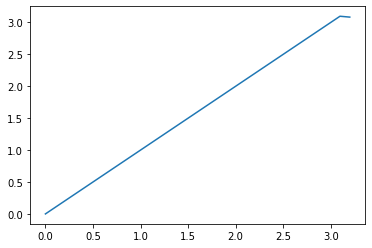

In [12]:
plt.plot(time,theta)

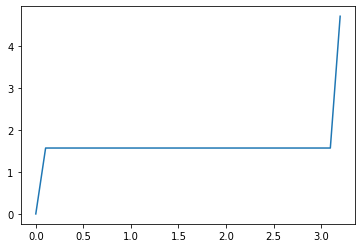

In [13]:
plt.plot(time,phi)

In [14]:
t_probe = 2.2
n_probe = (t_probe/t)*(n)
print(n_probe)
print(theta[-1])
print(phi[-1])
print(res.states[-1])

22.0
3.0831912876178245
[[4.71238898]]
Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[-0.02919653+0.j        ]
 [ 0.        +0.99957369j]]


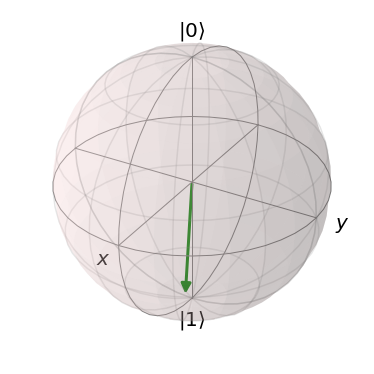

In [15]:
# Bloch Sphere 
bloch = Bloch()
# bloch.add_states(res.states[int(n_probe)])
bloch.add_states(res.states[-1])
bloch.show()

In [16]:
def measure_qbit(qbit):
    a = qbit[0]  # a
    b = qbit[0]  # b
    if np.random.random() <= np.abs(a) ** 2:
        return 0
    else:
        return 1

In [17]:
bins = []
n_measurements = 1000
true = 1
false = 0

n_false = 0

error = 0

for i in range(n_measurements):
    bit = measure_qbit(res.states[-1])
    if bit == false:
        n_false += 1
    
    bins.append(bit)
    
error = n_false/n_measurements

print(n_false)
print(error)

1
0.001


(array([  1.,   0., 999.]),
 array([0. , 0.1, 0.9, 1. ]),
 <a list of 3 Patch objects>)

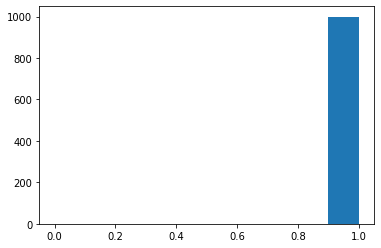

In [18]:
plt.hist(bins,bins=[0,0.1,0.9,1])